# Parte teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas

1 - O espaço de cores RGB é amplamente utilizado pois é o mais intuitivo para seres humanos

In [ ]:
# Falso - O espaço de cor mais intuitivo para os seres humanos é o HSV

2 - Imagens vetoriais apresentam serrilhamento quando são ampliadas

In [ ]:
# Falso - Imagens vetoriais não apresentam serrilhamento, somente imagens matriciais

3 - A lógica XOR aplicada em uma imagem detecta os pixels que mudaram de valor

In [ ]:
# Verdadeiro

4 - O código abaixo representa um circulo com 110px de altura, 128px de largura e rotacionado em 64 graus.

```<circle cx='110' cy='128' r='64' fill='red'/>```

In [ ]:
# Falso - cx e cy reoresentam a posição do centro e r representa o raio do circulo

5 - Algumas imagens podem ter um quarto canal chamado Alpha que representa a opacidade do pixel

In [ ]:
# Verdadeiro

# Parte prática

## Material de apoio

### Importações

```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

### Manipulação de imagens

```
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')
(l,c,p) = img.shape
```

### Greyscale

#### Algoritmo genérico, substituir o método escolhido
```
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (aplicar método)
```

#### Métodos: 

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$

### Escalonamento com nearest neighbor

```
ls, cs = l * sy, c * sx
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
```

### Cisalhamento

```
img_shear = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = int(j + cx * i)
        new_y = int(cy * j + i)
        
        img_shear[new_y, new_x] = img[i, j]
```

### Imagem grayscale para imagem binária de 3 canais

``` 
bin = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
for i in range(l):
    for j in range(c):
        if img[i,j] > thresh: 
            bin[i,j,:] = 255 
        else: 
            bin[i,j,:] = 0

```

**1 -** Importe as bibliotecas que serão usadas

In [ ]:
import numpy as np  # NumPy para operacoes numericas
from PIL import Image  # PIL para manipulacao de imagens
import matplotlib.pyplot as plt  # Matplotlib para plotagem de graficos

**2 -** Abra as imagens horse.jpg e landscape.png, retire o canal alpha se necessário, exiba essas imagens e mostre o formato de cada uma

(768, 1024, 3)
(384, 512, 3)


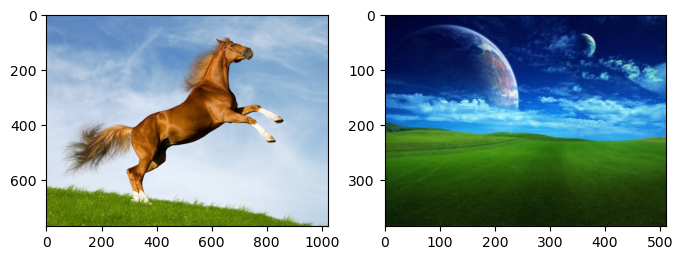

In [8]:
# Carregando a imagem "horse.jpg", [:,:,:3] tira o canal alpha:
horse = np.array(Image.open("horse.jpg"))[:,:,:3] 

# Carregando a imagem "landscape.jpg", [:,:,:3] tira o canal alpha:
landscape = np.array(Image.open("landscape.jpg"))[:,:,:3]  

# Criando uma figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem "horse.jpg" no primeiro subplot:
plt.subplot(2,2,1)
plt.imshow(horse)

# Exibindo a imagem "landscape.jpg" no segundo subplot:
plt.subplot(2,2,2)
plt.imshow(landscape)

# Imprimindo a forma (shape) do array da imagem "horse.jpg":
print(horse.shape)

# Imprimindo a forma (shape) do array da imagem "landscape.jpg":
print(landscape.shape)


**3 -** Crie uma função que realize o escalonamento de uma imagem que receba como parâmetro uma **imagem, sx e sy**, sendo sx e sy os fatores de escalonamento e **retorne a imagem escalonada**, em seguida aplique o escalonamento na imagem "landscape" para que fique do mesmo tamanho da imagem "horse". Exiba o resultado.

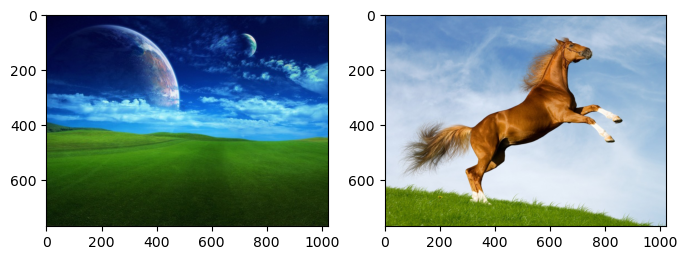

In [4]:
# Criando função para escalonar uma imagem:
def escalona_img(img,sx,sy):
    # Obtendo dimensoes da imagem:
    (l, c ,p) = img.shape
    
    # Calculando as novas dimensoes:
    (ls, cs) = (l*sx,c*sy)
    
    # Criando uma imagem vazia para as novas dimensoes:
    sc_image = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

    # Iterando sobre cada pixel na imagem escalonada: 
    for i in range(ls):
        for j in range(cs):
            # Calculando as coordenadas na imagem original correspondentes ao pixel na imagem escalonada:
            new_x= int(np.floor(i * (l / ls)))
            new_y = int(np.floor(j * (c / cs)))
            
            # Atribuindo o valor do pixel correspondente da imagem original para a imagem escalonada:
            sc_image[i, j] = img[new_x, new_y]
    
    # Retornando imagem escalonada        
    return sc_image

# Chamando a função para aumentar a imagem "landscape" em 2x em ambas as dimensões:
aumenta_landscape= escalona_img(landscape,2,2)

# Criando uma nova figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem "landscape.jpg" escalonada no primeiro subplot:
plt.subplot(2,2,1)
plt.imshow(aumenta_landscape)

# Exibindo a imagem "horse.jpg" escalonada no segundo subplot, para comparação:
plt.subplot(2,2,2)
plt.imshow(horse)

**4 -** Crie uma função para aplicar um método grayscale de sua escolha, que receba como **parâmetro uma imagem e retorne uma imagem em greyscale**. Aplique essa função na **imagem "horse"** e mostre o resultado.

Método de Lightness:

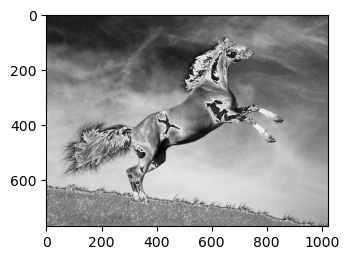

In [25]:
def lightness(img):
    # Calculando os valores máximos e mínimos para cada canal de cor (R, G, B) ao longo do eixo 2 (canal de cor)
    max_values = np.max(img, axis=2)
    min_values = np.min(img, axis=2)
    
    # A luminosidade é a média entre o valor máximo e mínimo dos canais de cor (R, G, B)
    light = ((max_values + min_values) / 2).astype(np.uint8)
    
    return light

# Chamando a função de lightness para calcular a luminosidade da imagem "horse.jpg":
horse_lightness = lightness(horse)

# Criando uma nova figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem "horse.jpg" em grayscale no primeiro subplot, utilizando a colormap 'gray' para exibir a imagem greyscale:
plt.subplot(2,2,1)
plt.imshow(horse_lightness, cmap="gray")


Método de Average:

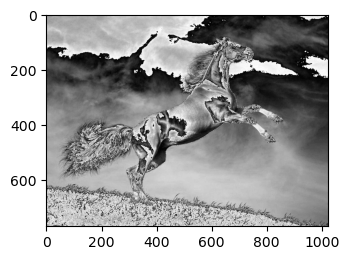

In [23]:
def average(img):
    avg = ((img[:,:,0] + 
            img[:,:,1] + 
            img[:,:,2])/3).astype(np.uint8)
   
    return avg

# Chamando a função de greyscale para alterar as cores da imagem "horse.jpg":
horse_avg = average(horse)

# Criando uma nova figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem "horse.jpg" em grayscale no primeiro subplot, utilizando a colormap 'gray' para exibir a imagem greyscale:
plt.subplot(2,2,1)
plt.imshow(horse_avg, cmap="gray")


Método de Luminosity:

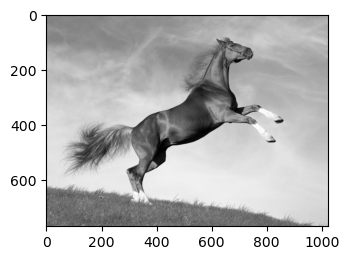

In [24]:
# Calculando a luminosidade para cada pixel da imagem utilizando a fórmula de conversão para escala de cinza:
# Coeficiente de luminosidade = 0.2126 para o canal (R)
# Coeficiente de luminosidade = 0.7152 para o canal (G)
# Coeficiente de luminosidade = 0.0722 para o canal (B)

def greyscale(img):
    # Aplicando a fórmula de conversão para escala de cinza em cada canal de cor (R, G, B)
    res = (img[:,:,0] * 0.2126 + 
           img[:,:,1] * 0.7152 + 
           img[:,:,2] * 0.0722).astype(np.uint8)
    
    return res

# Chamando a função de greyscale para alterar as cores da imagem "horse.jpg":
horse_grey = greyscale(horse)

# Criando uma nova figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem "horse.jpg" em grayscale no primeiro subplot, utilizando a colormap 'gray' para exibir a imagem greyscale:
plt.subplot(2,2,1)
plt.imshow(horse_grey, cmap="gray")


**5 -** Crie uma função para transformar uma imagem grayscale em uma imagem binária, que receba como **parâmetro uma imagem e o threshhold** para realizar a operação e retorne uma imagem binária. Aplique essa função na imagem resultante da **etapa anterior com threshold de valor 135** e mostre o resultado.

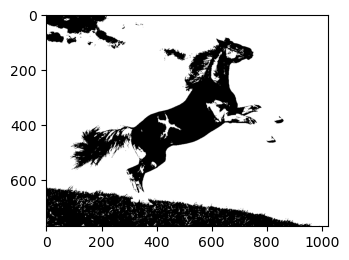

In [27]:
# Função para criar uma imagem binária com base em um valor de threshold
def binary_img(img, thresh):
    # Obtendo as dimensões da imagem:
    (l,c) = img.shape
    
    # Criando uma imagem vazia com as dimensoes:
    res = np.zeros(shape=(l,c,3),dtype=np.uint8)
    
    # Iterando sobre cada pixel na imagem:
    for i in range(l):
        for j in range(c):
            # Se pixel > limiar:
            if img[i,j] > thresh: 
                #  pixel = 255 (branco)
                res[i,j,:] = 255 
            else: 
                #  pixel = 0 (preto)
                res[i,j,:] = 0
                         
    # Retornando imagem binária           
    return res

# Chamando a função binary_img para converter a "horse.jpg" em greyscale para imagem binária com threshold = 135:
bin_horse = binary_img(horse_grey,135) 

# Criando uma nova figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem "horse.jpg" em binário no primeiro subplot:
plt.subplot(2,2,1)
plt.imshow(bin_horse)


**6 -** Realize a operação NOT com a imagem da **etapa anterior** e mostre o resultado

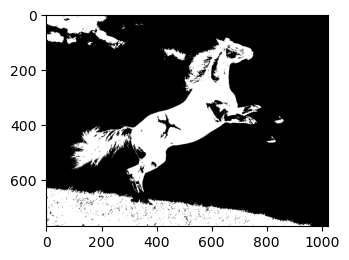

In [28]:
# Invertendo as cores do pixels da imagem binária com a operação NOT:
horse_not =~ bin_horse

# Criando uma nova figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem "horse.jpg" binária invertida no primeiro subplot:
plt.subplot(2,2,1)
plt.imshow(horse_not)

**7 -** Aplique a imagem da **questão anterior como uma máscara (Lógica E) com a imagem resultante do escalonamento na questão 3**. Mostre o resultado

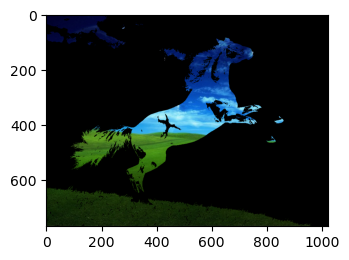

In [29]:
# Realizando a operação AND entre a imagem binária invertida e imagem landscape escalonada:
op_and = horse_not & aumenta_landscape

# Criando uma nova figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem resultante da operação AND no primeiro subplot:
plt.subplot(2,2,1)
plt.imshow(op_and)

**8 -** Crie uma função para aplicar o cisalhamento em cima de uma imagem, que **recebe como parâmetro uma imagem, cx e cy**, sendo cx e cy os coeficientes do cisalhamento e retorne a imagem com o efeito aplicado. 
**Aplique a função na imagem anterior com cx=0.3 e cy=0.2**. Mostre o resultado.

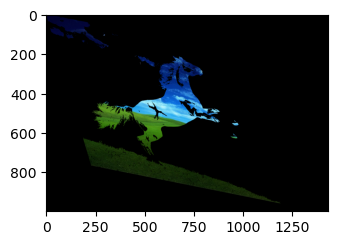

In [30]:
def cisalhamento(img, cx, cy):
    # Obtendo as dimensões da imagem:
    (l, c, p) = img.shape
    
    # Calculando as novas dimensões após cisalhamento, adicionando uma margem de 10% nas direções horizontal e vertical:
    cisalha = np.zeros((int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
    
    # Iterando sobre cada pixel na imagem de entrada:
    for i in range(l):
        for j in range(c):
            new_x = int(j + cx * i)  # Nova coordenada x após o cx
            new_y = int(cy * j + i)  # Nova coordenada y após o cy
            cisalha[new_y, new_x] = img[i, j] # Atribuindo pixel da imagem para a posição correspondente na imagem cisalhada:
            
    # Retornando a imagem cisalhada:
    return cisalha


# Chamando a função cisalhamento com cx=0.3 e cy=0.2:
cisalha_img = cisalhamento(op_and, 0.3, 0.2)

# Criando uma nova figura com tamanho de 8x8 polegadas:
plt.figure(figsize=(8,8))

# Exibindo a imagem com cisalhamento no primeiro subplot:
plt.subplot(2,2,1)
plt.imshow(cisalha_img)

**9 -** Salve a imagem da questão anterior no disco com o nome "resultado.jpg"

In [31]:
# Salvando imagem cisalhada:
Image.fromarray(cisalha_img).save("resultado.jpg")